# **BackPack Price Prediction**

### Library Importation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
samp = pd.read_csv('sample_submission.csv')

### Initial Exploration

In [3]:
train_data.head(3)

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320


In [4]:
test_data.head(3)

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799


In [5]:
samp.head(3)

,id,Price
0,300000,81.833910
1,300001,82.398994
2,300002,81.421760


In [8]:
train_data.columns

Index(['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price'],
      dtype='object')

In [9]:
print(f'''The Number of Rows-Columns in The Train Data are {train_data.shape}
The Number of Rows-COlumns in the Test Data are {test_data.shape}''')

The Number of Rows-Columns in The Train Data are (300000, 11)
The Number of Rows-COlumns in the Test Data are (200000, 10)


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


### Correlation Plot

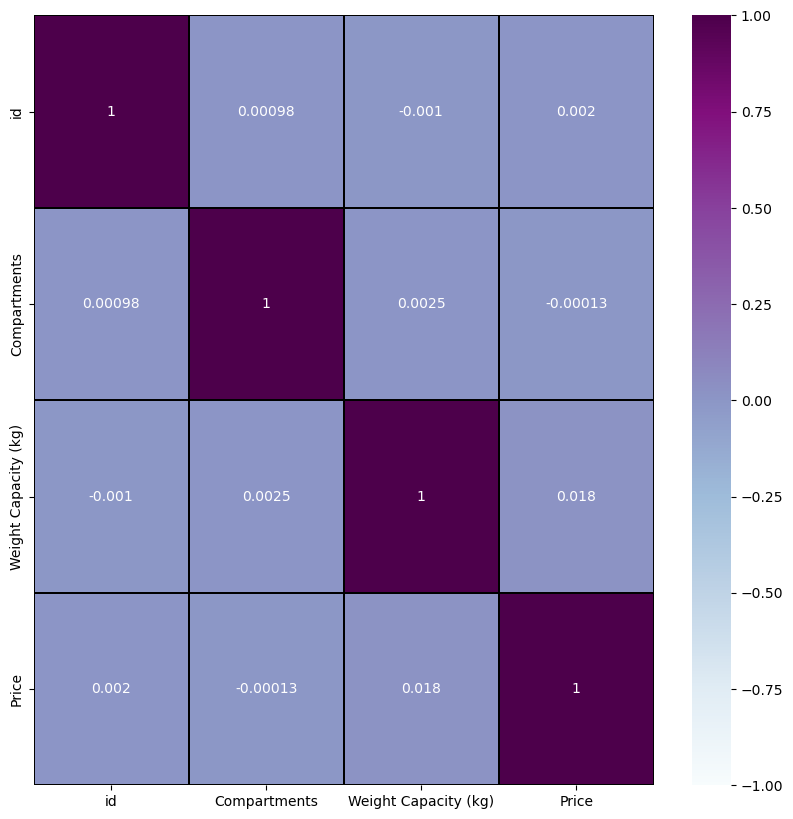

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data=train_data.corr(numeric_only=True), vmin= -1, vmax = 1, annot=True, linecolor='black',linewidths=0.05, cmap = 'BuPu')
plt.show()

### Exploratory Data Analysis

In [11]:
train_data.columns

Index(['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price'],
      dtype='object')

In [13]:
cat_cols = ['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color']

num_cols = ['Weight Capacity (kg)', 'Price']

#### Univariate Analysis

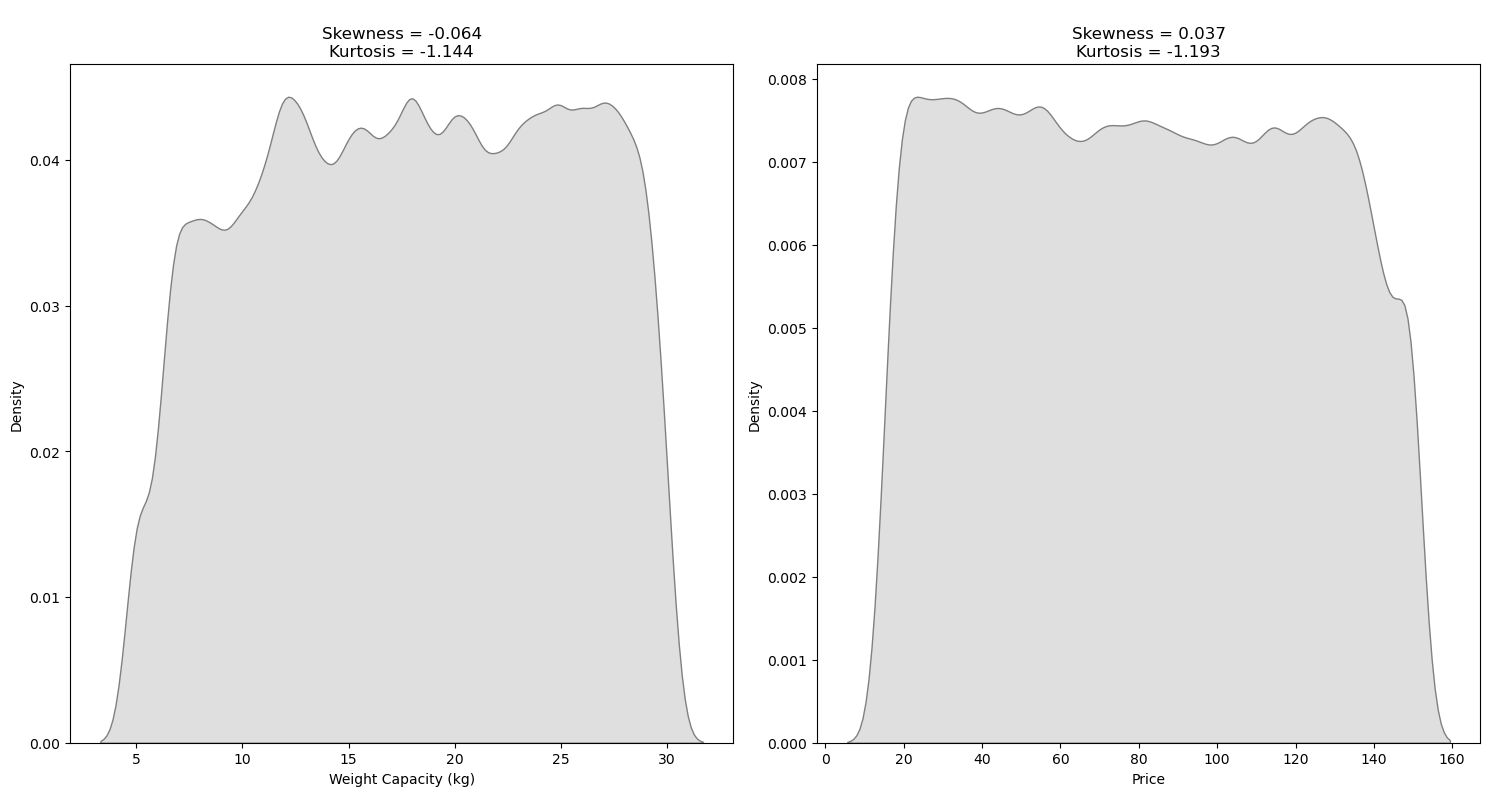

In [16]:
t = 1
plt.figure(figsize = (15,15))
for i in num_cols:
    plt.subplot(2,2,t)
    plt.title(f'''
Skewness = {round(train_data[i].skew(),3)}
Kurtosis = {round(train_data[i].kurt(),3)}''')
    sns.kdeplot(data = train_data, x = i, color= 'grey', fill = True)
    t = t+1

plt.tight_layout()
plt.show()

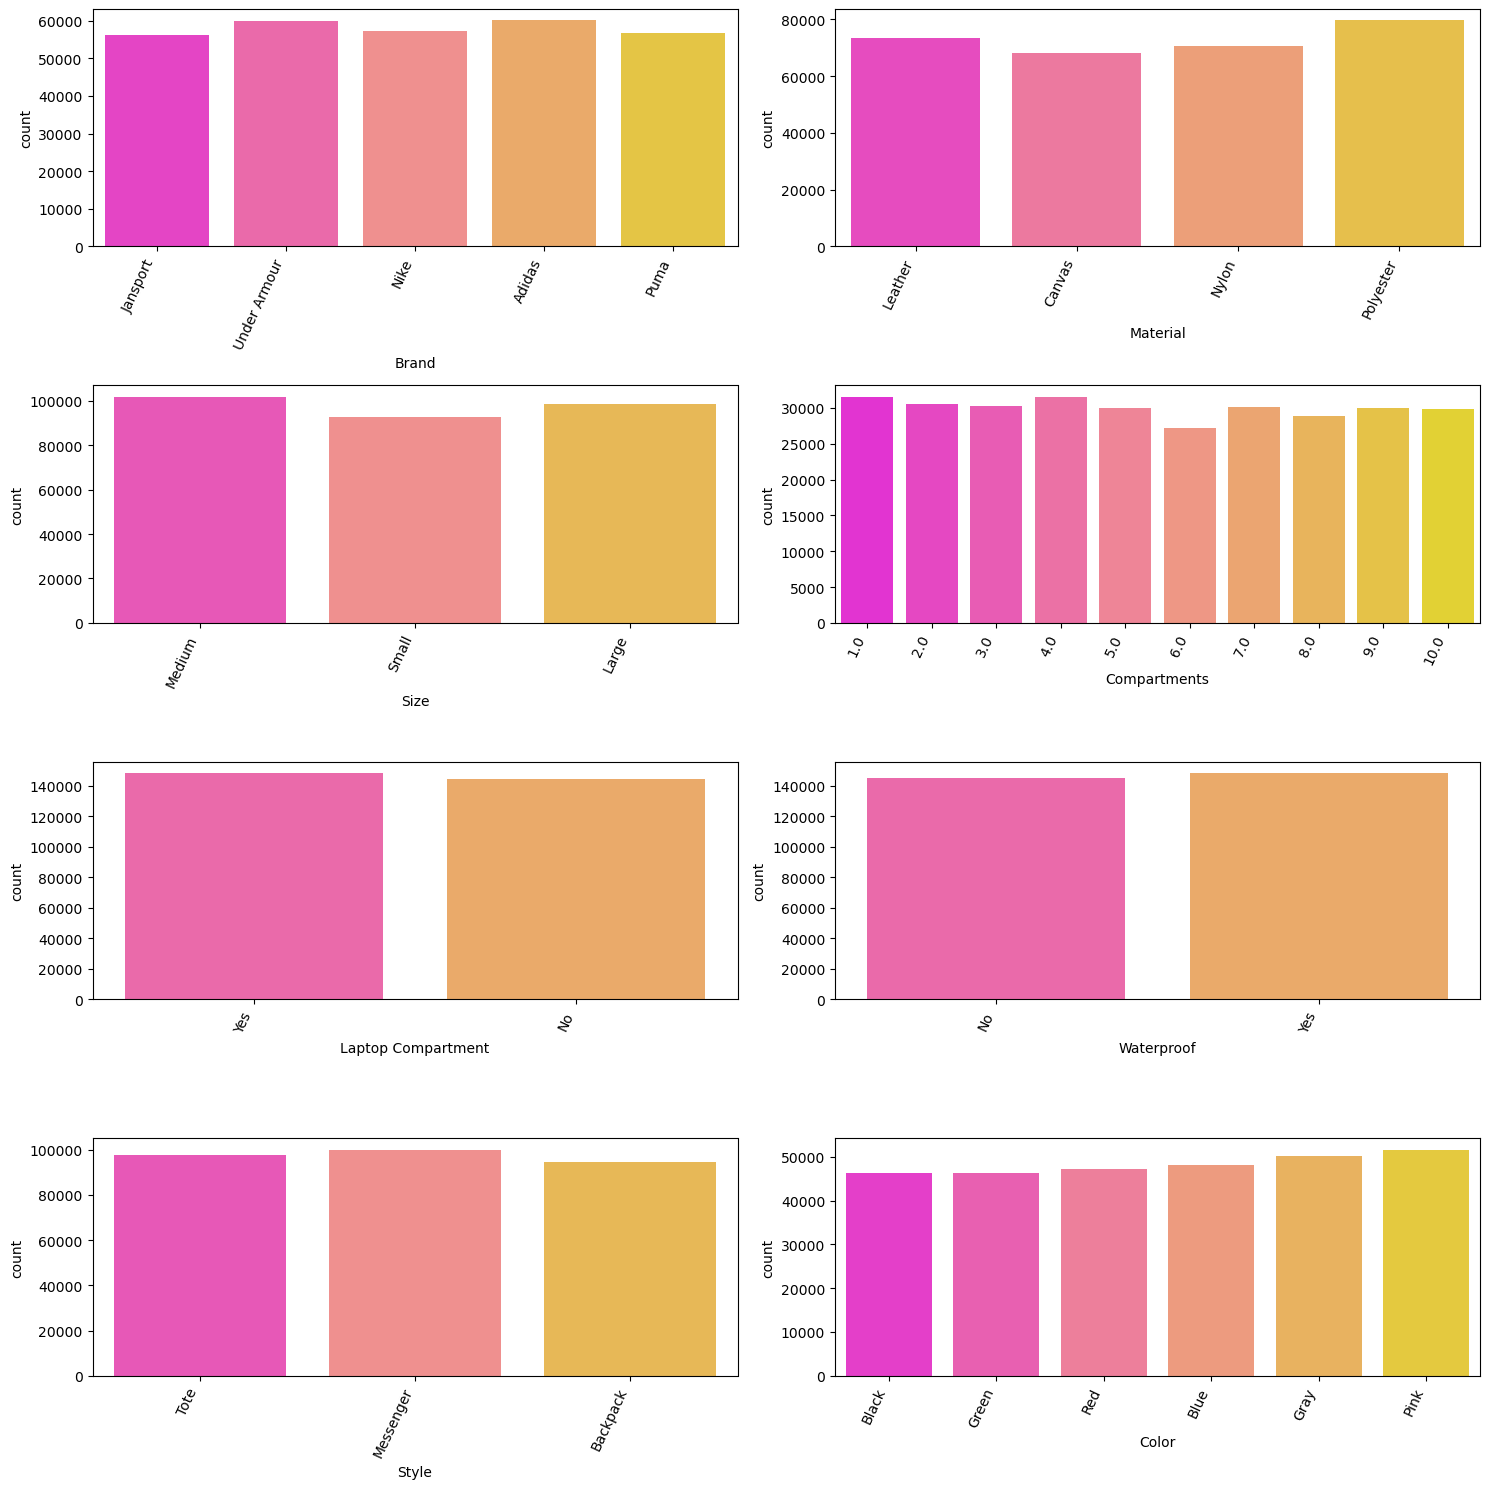

In [15]:
t = 1
plt.figure(figsize = (15,15))
for i in cat_cols:
    plt.subplot(4,2,t)
    plt.xticks(rotation = 65, ha = 'right')
    sns.countplot(data = train_data, x = i, palette= 'spring', fill = True)
    t = t+1

plt.tight_layout()
plt.show()

#### Bivariate Analysis

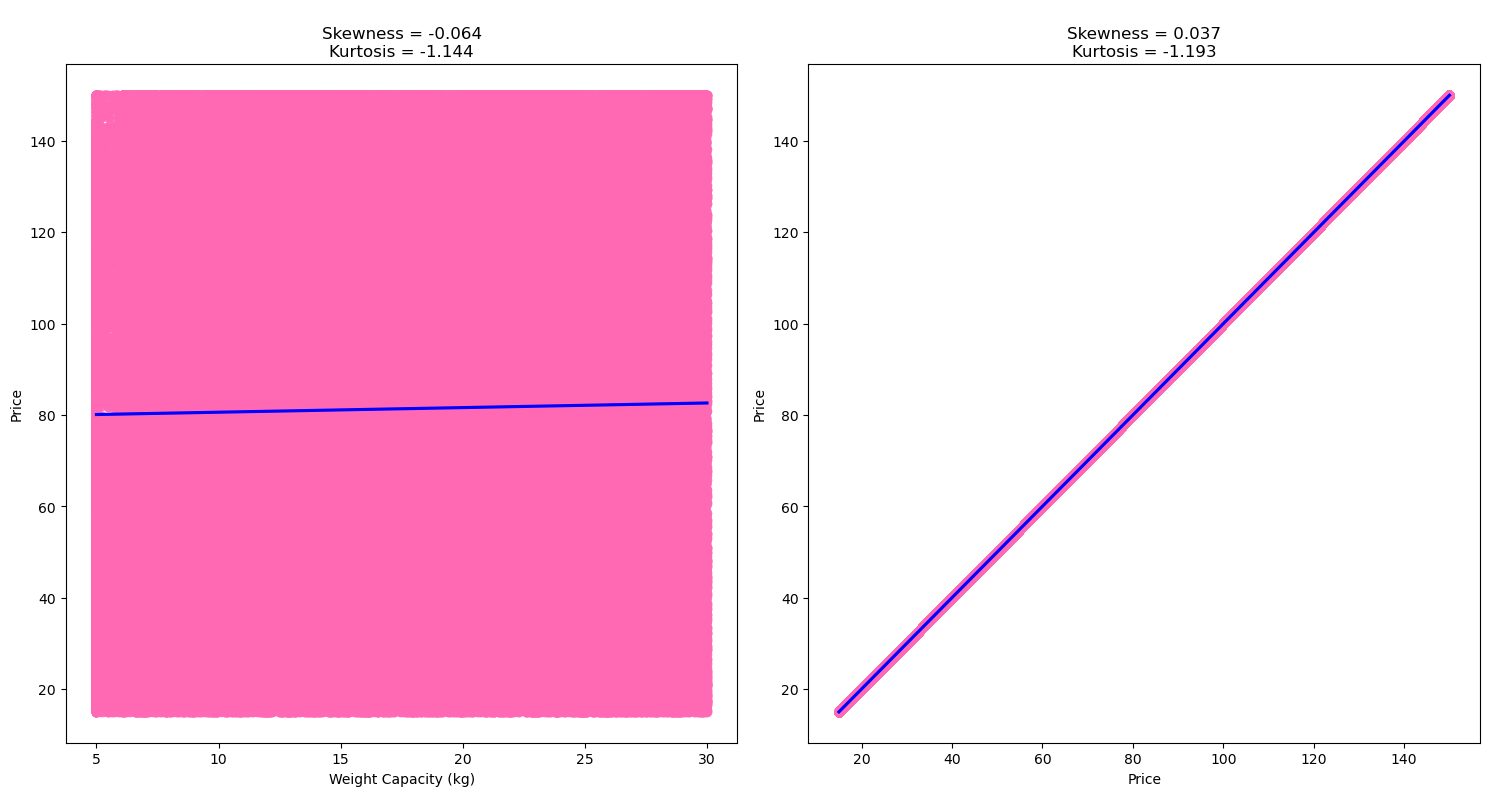

In [18]:
t = 1
plt.figure(figsize = (15,15))
for i in num_cols:
    plt.subplot(2,2,t)
    plt.title(f'''
Skewness = {round(train_data[i].skew(),3)}
Kurtosis = {round(train_data[i].kurt(),3)}''')
    sns.regplot(data = train_data, x = i, y = 'Price', line_kws={"color" : 'Blue'}, color="hotpink")
    t = t+1

plt.tight_layout()
plt.show()

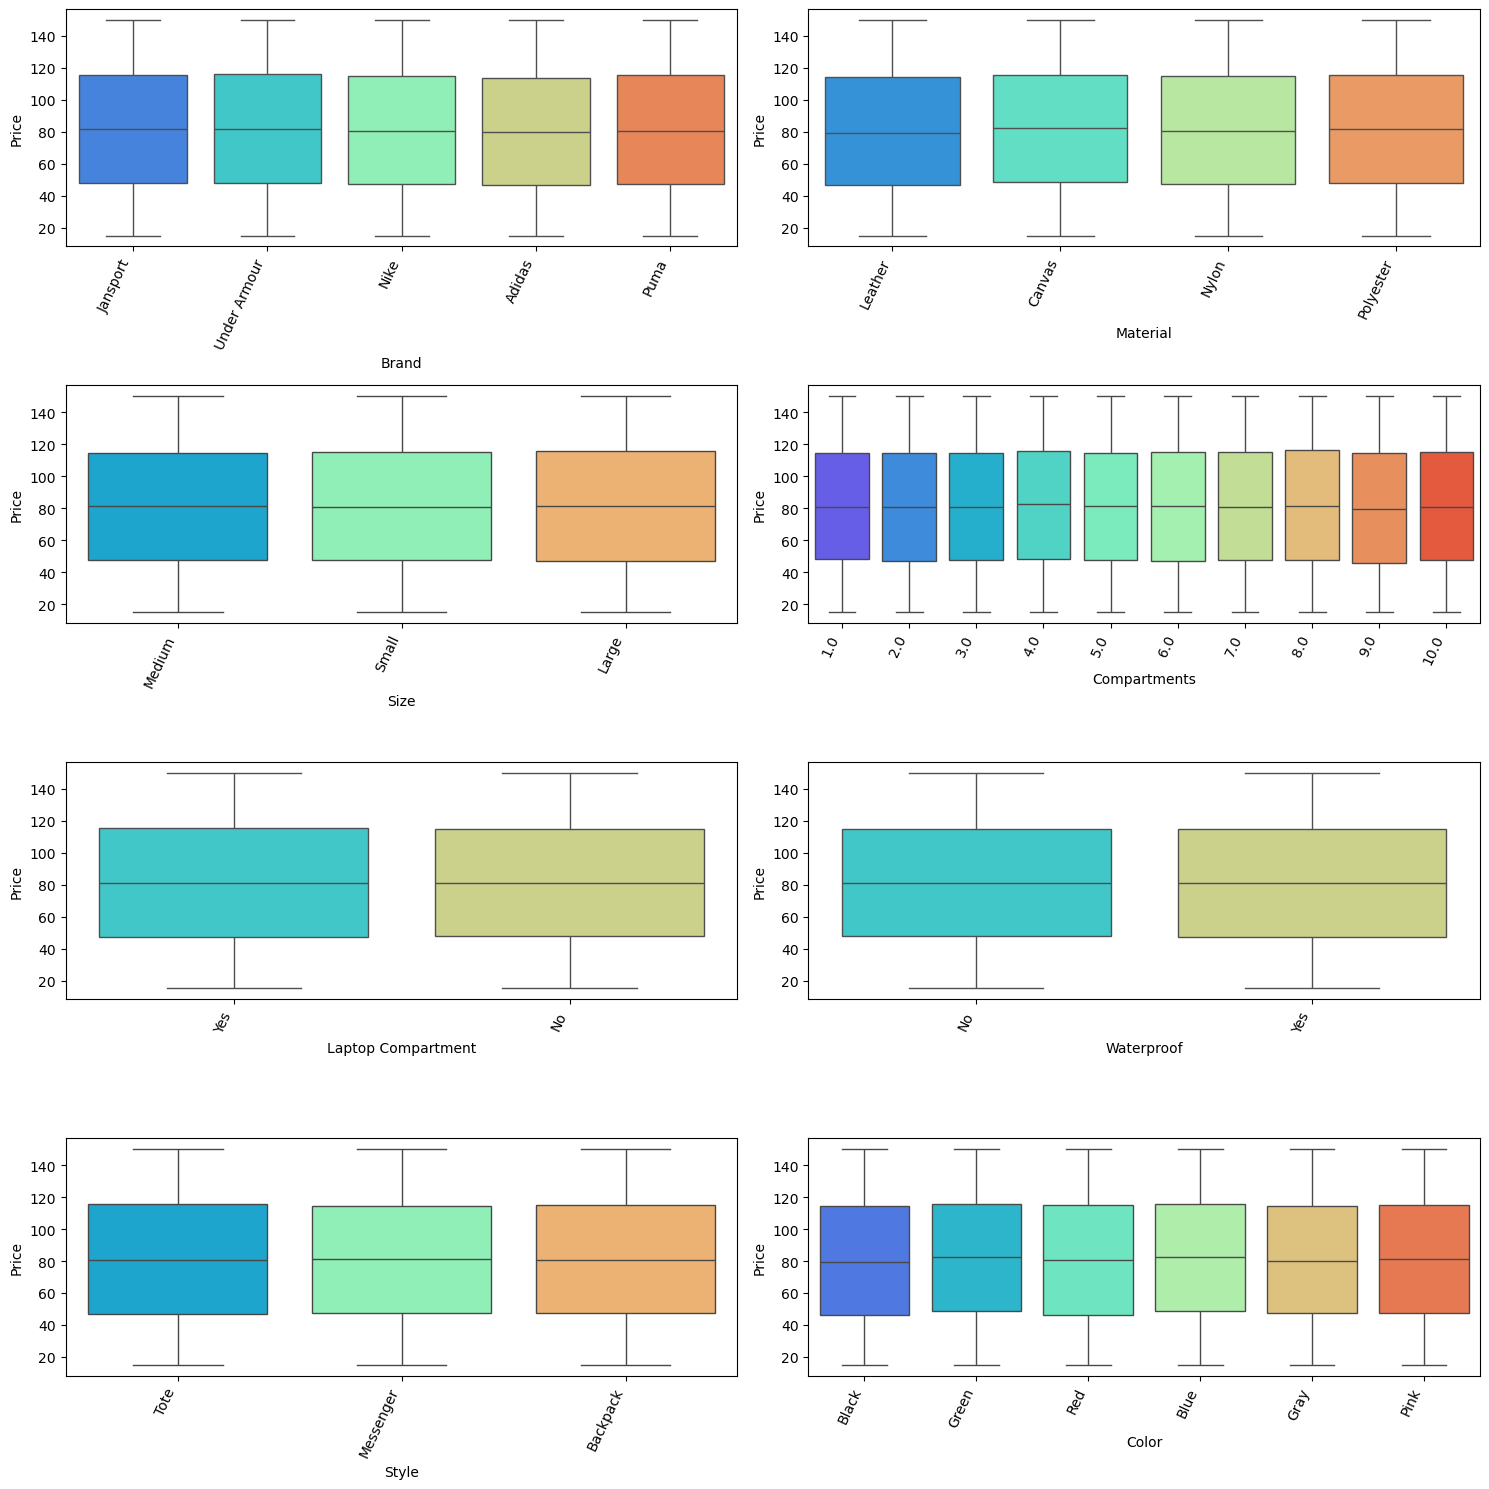

In [21]:

t = 1
plt.figure(figsize = (15,15))
for i in cat_cols:
    plt.subplot(4,2,t)
    plt.xticks(rotation = 65, ha = 'right')
    sns.boxplot(data = train_data, x = i, y = 'Price', color="tomato", palette='rainbow')
    t = t+1

plt.tight_layout()
plt.show()

Let's Make id as Index as it is the Unique Column


In [10]:
train_data.set_index("id", inplace=True)

In [11]:
test_data.set_index("id", inplace=True)

Let's Encode the Categorical Variables by using LabelEncoder

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
lb = LabelEncoder()

encod = ['Brand', "Material", "Size", "Laptop Compartment", 'Waterproof', 'Style', 'Color']

for i in encod:
    train_data[i] = lb.fit_transform(train_data[i])


In [14]:
for i in encod:
    test_data[i] = lb.fit_transform(test_data[i])

In [15]:
train_data

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
id,,,,,,,,,,
0,1,1,1,7.0,1,0,2,0,11.611723,112.15875
1,1,0,2,10.0,1,1,1,3,27.078537,68.88056
2,4,1,2,2.0,1,0,1,5,16.643760,39.17320
3,2,2,2,8.0,1,0,1,3,12.937220,80.60793
4,0,0,1,1.0,1,1,1,3,17.749338,86.02312
...,...,...,...,...,...,...,...,...,...,...
299995,0,1,2,9.0,0,0,2,1,12.730812,129.99749
299996,1,1,0,6.0,0,1,2,1,26.633182,19.85819
299997,3,0,0,9.0,1,1,0,4,11.898250,111.41364


In [16]:
test_data

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
id,,,,,,,,,
300000,3,1,2,2.0,0,0,2,3,20.671147
300001,2,0,1,7.0,0,1,0,3,13.564105
300002,0,0,0,9.0,0,1,1,1,11.809799
300003,0,2,0,1.0,1,0,1,3,18.477036
300004,5,2,0,2.0,1,1,2,0,9.907953
...,...,...,...,...,...,...,...,...,...
499995,0,0,0,2.0,1,0,1,5,7.383498
499996,2,3,2,9.0,0,1,1,4,6.058394
499997,1,2,2,9.0,0,1,2,3,26.890163


Let's rename the column Weight Capacity and Laptop Compartment as the title contains spaces

In [17]:
train_data.rename(columns = {'Laptop Compartment' : 'Laptop_Compartment', 'Weight Capacity (kg)' : 'Weight_Capacity'}, inplace=True)

test_data.rename(columns = {'Laptop Compartment' : 'Laptop_Compartment', 'Weight Capacity (kg)' : 'Weight_Capacity'}, inplace=True)

Let's Look for Duplicate values

In [18]:
train_data.duplicated().sum()

0

Let's Look For Missing Values

In [19]:
train_data.isnull().sum()

Brand                   0
Material                0
Size                    0
Compartments            0
Laptop_Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight_Capacity       138
Price                   0
dtype: int64

In [20]:
test_data.isnull().sum()

Brand                  0
Material               0
Size                   0
Compartments           0
Laptop_Compartment     0
Waterproof             0
Style                  0
Color                  0
Weight_Capacity       77
dtype: int64

So Both test and train data have null values in Weight Capacity column so we encounter this issue with KNNImputer

In [21]:
from sklearn.impute import SimpleImputer

In [22]:

imputer = SimpleImputer(strategy='mean')

train_data['Weight_Capacity'] = imputer.fit_transform(train_data[['Weight_Capacity']])

test_data['Weight_Capacity'] = imputer.transform(test_data[['Weight_Capacity']])


In [23]:
train_data

,Brand,Material,Size,Compartments,Laptop_Compartment,Waterproof,Style,Color,Weight_Capacity,Price
id,,,,,,,,,,
0,1,1,1,7.0,1,0,2,0,11.611723,112.15875
1,1,0,2,10.0,1,1,1,3,27.078537,68.88056
2,4,1,2,2.0,1,0,1,5,16.643760,39.17320
3,2,2,2,8.0,1,0,1,3,12.937220,80.60793
4,0,0,1,1.0,1,1,1,3,17.749338,86.02312
...,...,...,...,...,...,...,...,...,...,...
299995,0,1,2,9.0,0,0,2,1,12.730812,129.99749
299996,1,1,0,6.0,0,1,2,1,26.633182,19.85819
299997,3,0,0,9.0,1,1,0,4,11.898250,111.41364


In [24]:
test_data

,Brand,Material,Size,Compartments,Laptop_Compartment,Waterproof,Style,Color,Weight_Capacity
id,,,,,,,,,
300000,3,1,2,2.0,0,0,2,3,20.671147
300001,2,0,1,7.0,0,1,0,3,13.564105
300002,0,0,0,9.0,0,1,1,1,11.809799
300003,0,2,0,1.0,1,0,1,3,18.477036
300004,5,2,0,2.0,1,1,2,0,9.907953
...,...,...,...,...,...,...,...,...,...
499995,0,0,0,2.0,1,0,1,5,7.383498
499996,2,3,2,9.0,0,1,1,4,6.058394
499997,1,2,2,9.0,0,1,2,3,26.890163


In [25]:
train_data

,Brand,Material,Size,Compartments,Laptop_Compartment,Waterproof,Style,Color,Weight_Capacity,Price
id,,,,,,,,,,
0,1,1,1,7.0,1,0,2,0,11.611723,112.15875
1,1,0,2,10.0,1,1,1,3,27.078537,68.88056
2,4,1,2,2.0,1,0,1,5,16.643760,39.17320
3,2,2,2,8.0,1,0,1,3,12.937220,80.60793
4,0,0,1,1.0,1,1,1,3,17.749338,86.02312
...,...,...,...,...,...,...,...,...,...,...
299995,0,1,2,9.0,0,0,2,1,12.730812,129.99749
299996,1,1,0,6.0,0,1,2,1,26.633182,19.85819
299997,3,0,0,9.0,1,1,0,4,11.898250,111.41364


In [26]:
test_data

,Brand,Material,Size,Compartments,Laptop_Compartment,Waterproof,Style,Color,Weight_Capacity
id,,,,,,,,,
300000,3,1,2,2.0,0,0,2,3,20.671147
300001,2,0,1,7.0,0,1,0,3,13.564105
300002,0,0,0,9.0,0,1,1,1,11.809799
300003,0,2,0,1.0,1,0,1,3,18.477036
300004,5,2,0,2.0,1,1,2,0,9.907953
...,...,...,...,...,...,...,...,...,...
499995,0,0,0,2.0,1,0,1,5,7.383498
499996,2,3,2,9.0,0,1,1,4,6.058394
499997,1,2,2,9.0,0,1,2,3,26.890163


### Machine Learning Models

Let's make train test split 

In [27]:
x = train_data.drop(columns= 'Price')
y = train_data['Price']

In [28]:
x.columns

Index(['Brand', 'Material', 'Size', 'Compartments', 'Laptop_Compartment',
       'Waterproof', 'Style', 'Color', 'Weight_Capacity'],
      dtype='object')

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=9) # These are col number
pca_df = pca.fit_transform(x)

In [31]:
pca.explained_variance_ratio_

array([0.73793988, 0.12710613, 0.04817266, 0.03435472, 0.02107998,
       0.01130324, 0.01102396, 0.00461881, 0.00440064])

In [33]:
pca.explained_variance_ratio_.cumsum()

array([0.73793988, 0.86504601, 0.91321867, 0.94757339, 0.96865336,
       0.9799566 , 0.99098056, 0.99559936, 1.        ])

In [34]:
pca_final = PCA(n_components = 5)
pca_df = pca_final.fit_transform(x)

In [36]:
pca_df = pd.DataFrame(pca_df, columns = ['Magic1', 'Magic2', 'Magic3', 'Magic4', 'Magic5'])

In [37]:
pca_df

,Magic1,Magic2,Magic3,Magic4,Magic5
0,-6.416075,1.574005,-2.631409,-1.107722,-0.593013
1,9.053193,4.544174,0.374778,-1.104128,-1.620357
2,-1.392395,-3.450104,2.351242,1.896753,-0.645052
3,-5.088921,2.559990,0.372835,-0.096104,0.387976
4,-0.287346,-4.440919,0.355794,-2.114320,-1.611528
...,...,...,...,...,...
299995,-5.294487,3.570736,-1.622887,-2.106756,-0.590879
299996,8.603698,0.554667,-1.632002,-1.099952,-0.621434
299997,-6.129842,3.560716,1.361048,0.895675,-1.624127
299998,-11.858630,-4.429053,1.362684,-2.102294,0.398073


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_val, y_train, y_val = train_test_split(pca_df,y,test_size= 0.2, random_state=5)

In [41]:
print(f'''Train Size of X = {x_train.shape}
Train Size of Y = {y_train.shape}
Validation Size of X = {x_val.shape}
Validation Size of y = {y_val.shape}''')

Train Size of X = (240000, 5)
Train Size of Y = (240000,)
Validation Size of X = (60000, 5)
Validation Size of y = (60000,)


Let's make function for model validation 

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, VotingRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

As we need only rmse so will only import rmse

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
def model_val(model,xtr,ytr,xts,yts):
    mod = model
    mod.fit(xtr,ytr)
    pred = mod.predict(xts)


    print(f'Root Mean Squared Error : {(mean_squared_error(yts, pred))**0.5}')

In [45]:
model_val(LinearRegression(), x_train, y_train, x_val, y_val)

Root Mean Squared Error : 39.02661950116489


In [46]:
model_val(DecisionTreeRegressor(), x_train, y_train, x_val, y_val)

Root Mean Squared Error : 55.73648777100126


In [47]:
model_val(AdaBoostRegressor(), x_train, y_train, x_val, y_val)

Root Mean Squared Error : 39.01909586720724


In [48]:
model_val(KNeighborsRegressor(), x_train, y_train, x_val, y_val)

Root Mean Squared Error : 42.79146566362278


In [49]:
model_val(GradientBoostingRegressor(), x_train, y_train, x_val, y_val)

Root Mean Squared Error : 39.01334864931801


In [50]:
model_val(XGBRegressor(), x_train, y_train, x_val, y_val)

Root Mean Squared Error : 39.12952536990439


In [51]:
model_val(LGBMRegressor(), x_train, y_train, x_val, y_val)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 5
[LightGBM] [Info] Start training from score 81.469259
Root Mean Squared Error : 39.02802962104209


In [52]:
model_val(CatBoostRegressor(), x_train, y_train, x_val, y_val)

Learning rate set to 0.097331
0:	learn: 39.0377683	total: 171ms	remaining: 2m 51s
1:	learn: 39.0347583	total: 199ms	remaining: 1m 39s
2:	learn: 39.0321217	total: 226ms	remaining: 1m 15s
3:	learn: 39.0299558	total: 254ms	remaining: 1m 3s
4:	learn: 39.0280518	total: 279ms	remaining: 55.6s
5:	learn: 39.0260939	total: 308ms	remaining: 51s
6:	learn: 39.0246839	total: 333ms	remaining: 47.3s
7:	learn: 39.0231258	total: 357ms	remaining: 44.3s
8:	learn: 39.0214649	total: 382ms	remaining: 42.1s
9:	learn: 39.0203928	total: 410ms	remaining: 40.6s
10:	learn: 39.0189113	total: 433ms	remaining: 38.9s
11:	learn: 39.0178818	total: 455ms	remaining: 37.5s
12:	learn: 39.0167551	total: 478ms	remaining: 36.3s
13:	learn: 39.0155515	total: 501ms	remaining: 35.3s
14:	learn: 39.0143765	total: 522ms	remaining: 34.2s
15:	learn: 39.0131404	total: 550ms	remaining: 33.9s
16:	learn: 39.0124739	total: 576ms	remaining: 33.3s
17:	learn: 39.0117642	total: 600ms	remaining: 32.7s
18:	learn: 39.0110452	total: 624ms	remainin

In [53]:
model_val(BaggingRegressor(), x_train, y_train, x_val, y_val)

Root Mean Squared Error : 42.13641333919044


Let's Tune models

In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
grid = {'n_estimators' : [100,200,500], 'max_depth' : [2,3,4,5], 'learning_rate' : [0.001,0.01,0.02,0.05,0.1,0.2]}

In [70]:
grid = {
    'n_estimators': [300, 500, 700],  # Increase estimators for better learning
    'max_depth': [3, 4, 5, 6],  # Slightly deeper trees for capturing more patterns
    'learning_rate': [0.01, 0.02, 0.05],  # Avoid very high learning rates that can overshoot optimal solutions
    'subsample': [0.7, 0.8, 0.9],  # Helps prevent overfitting
    'colsample_bytree': [0.7, 0.8, 0.9],  # Controls feature sampling per tree
    'min_child_weight': [1, 3, 5]  # Regularization to prevent overfitting
}

In [72]:
rscv = RandomizedSearchCV(estimator=XGBRegressor(), param_distributions=grid, scoring='neg_root_mean_squared_error', verbose= 3, cv = 5)
rscv.fit(
    x_train, y_train,
    eval_set=[(x_val, y_val)],  # Validation set
    early_stopping_rounds=50,  # Stop if no improvement in 50 rounds
    verbose=True
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	validation_0-rmse:85.99912
[1]	validation_0-rmse:82.58496
[2]	validation_0-rmse:79.38406
[3]	validation_0-rmse:76.38059
[4]	validation_0-rmse:73.56128
[5]	validation_0-rmse:70.92650
[6]	validation_0-rmse:68.46120
[7]	validation_0-rmse:66.15859
[8]	validation_0-rmse:64.00781
[9]	validation_0-rmse:62.00458
[10]	validation_0-rmse:60.13392
[11]	validation_0-rmse:58.39888
[12]	validation_0-rmse:56.78830
[13]	validation_0-rmse:55.30108
[14]	validation_0-rmse:53.91859
[15]	validation_0-rmse:52.64116
[16]	validation_0-rmse:51.46111
[17]	validation_0-rmse:50.37261
[18]	validation_0-rmse:49.36782
[19]	validation_0-rmse:48.44802
[20]	validation_0-rmse:47.60507
[21]	validation_0-rmse:46.82599
[22]	validation_0-rmse:46.11465
[23]	validation_0-rmse:45.46049
[24]	validation_0-rmse:44.86478
[25]	validation_0-rmse:44.32033
[26]	validation_0-rmse:43.82432
[27]	validation_0-rmse:43.37231
[28]	validation_0-rmse:42.95896
[29]	validation_0-rms

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9],
                                        'learning_rate': [0.01, 0.02, 0.05],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [300, 500, 700],
                                        'subsample': [0.7, 0.8, 0.9]},
                   scoring='neg_root_mean_squared_error', verbose=3)

In [62]:
model_val(XGBRegressor(learning_rate=0.1, max_depth=2, n_estimators=200),x_train, y_train, x_val, y_val)

Root Mean Squared Error : 39.0092804871376


In [73]:
rscv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.02, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [74]:
rscv.best_params_

{'subsample': 0.8,
 'n_estimators': 500,
 'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.02,
 'colsample_bytree': 0.9}

In [75]:
rscv.best_score_

-39.020408704920314

In [61]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Define individual models
lgbm = LGBMRegressor()
ada = AdaBoostRegressor()
grad = GradientBoostingRegressor()
lin = LinearRegression()
xgb = XGBRegressor(n_estimators= 200, max_depth = 3, learning_rate = 0.05)

# Create a voting regressor (hard voting is not available for regressors)
voting_reg = VotingRegressor(
    estimators=[('lgbm', lgbm), ('ada', ada), ('grad', grad), ('lin', lin), ('xgb', xgb)]
)

# Fit the voting model
voting_reg.fit(x_train, y_train)

# Predict and evaluate RMSE
from sklearn.metrics import mean_squared_error
y_pred = voting_reg.predict(x_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)  # RMSE
print(f"Voting Regressor RMSE: {rmse:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 5
[LightGBM] [Info] Start training from score 81.469259
Voting Regressor RMSE: 39.0126


In [77]:
from sklearn.svm import SVR

In [63]:
final_model = XGBRegressor(learning_rate=0.1, max_depth=2, n_estimators=200)

In [64]:
final_model.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [65]:
pred = final_model.predict(test_data)

In [66]:
pred

array([81.83391 , 82.398994, 81.42176 , ..., 81.726524, 81.83225 ,
       81.59586 ], dtype=float32)

In [67]:
samp

,id,Price
0,300000,82.225114
1,300001,82.499989
2,300002,82.360525
3,300003,81.141163
4,300004,78.381878
...,...,...
199995,499995,79.218068
199996,499996,79.876762
199997,499997,82.283357
199998,499998,81.541071


In [68]:
samp['Price'] = pred

In [69]:
samp.to_csv('sample_submission.csv', index=False)